# UVOD V PYTHON SIMULACIJO FIZIKALNIH PRIMEROV

## GIBANJE

![alt text](pictures\enacbe-gibanja.png "Title")

## IMPORTS

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# enable jupyter plots
%matplotlib inline

## NUMPY building data

In [2]:
a = [0,1,2,3]
b = [10,11,12,13]
print(a)
print(b)

a_arr = np.array(a)
b_arr = np.array(b)

print('vstack = vertical stack')
print(np.vstack((a,b)))

print('hstack = horizontal stack')
print(np.hstack((a,b)))

[0, 1, 2, 3]
[10, 11, 12, 13]
vstack = vertical stack
[[ 0  1  2  3]
 [10 11 12 13]]
hstack = horizontal stack
[ 0  1  2  3 10 11 12 13]


In [8]:
# rezervacija praznega arraya
data= np.empty((0,3))
# števec
i = 0

In [13]:
# vsakič ko poženemo celico se števec poceča za ena
i = i + 1
row = [i, i**2, i**3]
# podatke zložimo v np.array ki predstavlja eno vrstico
row = np.array(row)

# vrstico dodamo zadnjim podatkom
data = np.vstack((data,row))
data

array([[  1.,   1.,   1.],
       [  2.,   4.,   8.],
       [  3.,   9.,  27.],
       [  4.,  16.,  64.],
       [  5.,  25., 125.]])

In [14]:
# ko zlagamo podatke, moramo vnaprej poznati št stolpcev
data= np.empty((0,3))

for i in range(5):
    # novi podatki
    x = i
    y1 = i**2
    y2 = i**3
    # podatke zložimo v np.array ki predstavlja eno vrstico
    row = np.array([x,y1,y2])
    # vrstico dodamo zadnjim podatkom
    data = np.vstack((data,row))

data

array([[ 0.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

### DOSTOPANJE DO VRSTICE PODATKOV

In [15]:
print(data[0])
print(data[1])
print(data[-1])

[0. 0. 0.]
[1. 1. 1.]
[ 4. 16. 64.]


In [177]:
data[0]

# vsak index je ena vrstica
for vrstica in data:
    print(vrstica)

[0. 0. 0.]
[1. 1. 1.]
[2. 4. 8.]
[ 3.  9. 27.]
[ 4. 16. 64.]


### DOSTOPANJE DO STOLPCA PODATKOV = TRANSPONIRANJE

In [16]:
print(data.T[0])
print(data.T[1])
print(data.T[2])

[0. 1. 2. 3. 4.]
[ 0.  1.  4.  9. 16.]
[ 0.  1.  8. 27. 64.]


In [17]:
# če želiš dostopati do celotnega stolpca, moraš matriko transponirati
# vsak index je en stolpec
for stolpec in data.T:
    print(stolpec)

[0. 1. 2. 3. 4.]
[ 0.  1.  4.  9. 16.]
[ 0.  1.  8. 27. 64.]


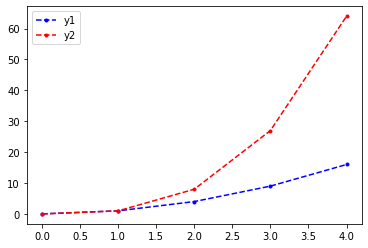

In [19]:
# narišemo podatke
# podatke transponiramo, da dostopamo do stolpcev
x = data.T[0]  
y1 = data.T[1]  
y2 = data.T[2]  

plt.plot(x, y1, 'b.--', label = 'y1')
plt.plot(x, y2, 'r.--', label = 'y2')
plt.legend()
plt.show()

# PRIMERI NUMERIČNIH IZRAČUNOV ENAČB GIBANJA

## ENAKOMERNO GIBANJE

\begin{equation*}
    \begin{array}{l}

    a = 0  & \text{ ... acceleration} \\
    v = v_0 = const &  \text{ ... velocity} \\
    s = s_0 + v_0*t  & \text{ ...path}\\

    \end{array}
\end{equation*}

## Opis naloge

Tekač teče s konstantno hitrostjo 10.8 km/h. Koliko preteče v času 1 minute. Izračunaj za časovne korake po 100ms.

In [20]:
# vhodni podatki za izračun
dt = 1       # časovni korak 100ms [s]
t_total = 60   # celotni čas 1min = 60s
st_tock = t_total/dt
print(f'st_tock = {st_tock}')

v_0 = 10.8 / 3.6  # začetna hitrost [m/s]

st_tock = 60.0


### 1. NAČIN, najlažji, naredimo array časovnih korakov

[0 1] ... [59 60]
[0. 3. 6.] ... [174. 177. 180.]


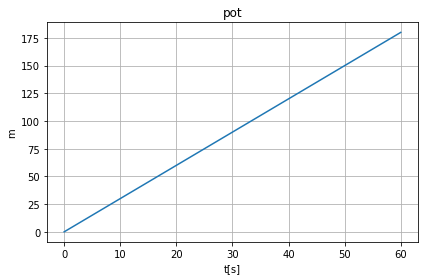

180.0

In [23]:
# naredimo array časovnih točk
t = np.arange(0, t_total+dt, dt)

# izračunamo pot za vsako točko
s = v_0 * t   # pot se enakomerno povečuje

print(t[0:2], '...', t[-2:])
print(s[:3], '...', s[-3:])

# IZRIŠEMO PODATKE
fig, ax = plt.subplots()

# graf poti
ax.plot(t, s)
ax.set_title("pot")
ax.set_ylabel('m')
ax.set_xlabel('t[s]')

# grid na vse grafe
ax.grid(True)

# razmik med grafi
plt.tight_layout()
# display
plt.show()

s = 60*10.8/3.6
s

### 2. NAČIN, while/for zanka ki se zavrti za vsak časovni korak

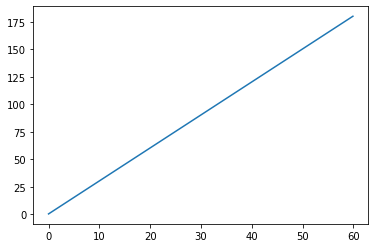

In [133]:
# imeli bomo 2 stolpce, 
data = np.empty((0,2))
t = 0             # trenutni čas 
s = 0             # trenutna  pot

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:
    # hitrost --> pot
    s = s + v_0 * dt   # pot se enakomerno povečuje

    # podatki ene iteracije so ena vrstica
    vrstica = np.array([t, s])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))

    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
s_arr = data.T[1]  

# graf poti
plt.plot(t_arr, s_arr)

### Naloga

Avto se vozi 10 sekund s hitrostjo 60km/h, nato 30 sekund 100km/h, nato 20 sekund 20km/h. Izračunaj celotno prevoženo pot.
pospeškov ne upoštevaj.

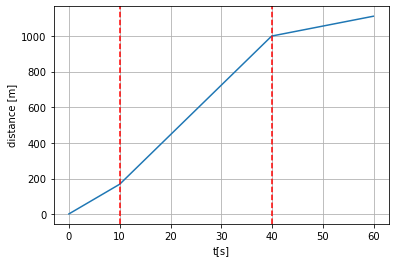

1110.000000000023


In [134]:
# 0s  ... 10s    60 km/h
# 10s ... 40s   100 km/h
# 40s ... 60s    20 km/h

v_1 = 60 / 3.6   # [m/s]
v_2 = 100 / 3.6  # [m/s]
v_3 = 20 / 3.6   # [m/s]

t_1 = 10 # [s]
t_2 = 30 # [s]
t_3 = 20 # [s]
t_total = t_1 + t_2 + t_3

# imeli bomo 2 stolpce, 
data = np.empty((0,2))
t = 0             # trenutni čas 
s = 0             # trenutna  pot

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:
    if t < 10:
        v = v_1
    if 10 < t < 40:
        v = v_2
    if 40 < t: 
        v = v_3

    # hitrost --> pot
    s = s + v * dt   # pot se enakomerno povečuje

    # podatki ene iteracije so ena vrstica
    vrstica = np.array([t, s])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))

    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
s_arr = data.T[1]  

# graf poti
# IZRIŠEMO PODATKE
fig, ax = plt.subplots()

ax.plot(t_arr, s_arr)
ax.axvline(10, color='r', linestyle='--')
ax.axvline(40, color='r', linestyle='--')
ax.set_ylabel('distance [m]')
ax.set_xlabel('t[s]')
ax.grid()
plt.show()

print(s_arr.max())

# ENAKOMERNO POSPEŠENO GIBANJE

Pri različnih pospeških je vsaka časovni trenutek odvisen od trenutka pred njim, zato je včasih potrebno simulacije delati v for/while zanki.

\begin{equation*}
    \begin{array}{l}

    a = const  & \text{ ... acceleration} \\
    v = a*t &  \text{ ... velocity} \\
    s = s_0 + v_0*t+0.5*a*t^2  & \text{ ...path}\\   

    \end{array}
\end{equation*}

In [25]:
s_0 = 0
v_0 = 0
a_0 = 3
t = 10

s = s_0 + v_0*t + 0.5*a_0*t**2
s

150.0

## Opis naloge
Avto pospešuje 10 sekund. Kakšna je njegova končna hitrost in koliko poti je prevozil v tem času pospeševanja ? 
Average acceleration of ordinary car is between 3 and 4 m/s^2.

st_tock = 10000.0


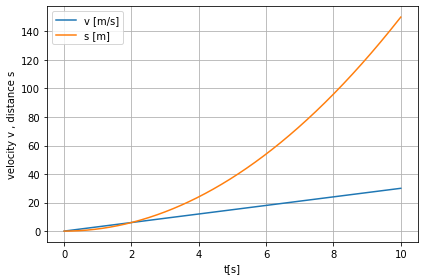

array([149.925009, 149.955003, 149.985   , 150.015   , 150.045003])

In [33]:
# KONSTANTE
dt = 0.001       # časovni korak 100ms [s]
t_total = 10   # celotni čas 1min = 60s
st_tock = t_total/dt
print(f'st_tock = {st_tock}')

a_0 = 3  # začetni pospešek [m/s^2]
v_0 = 0  # začetna hitrost [m/s]

# imeli bomo 3 stolpce, 
data = np.empty((0,3))
t = 0               # trenutni čas 
v = v_0               # trenutna hitrost
s = 0               # trenutna pot

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:
    # pospešsk --> hitrost
    v = v + a_0*dt # v = const

    # hitrost --> pot
    s = s + v * dt   # pot se enakomerno povečuje

    # podatki ene iteracije so ena vrstica vrstico
    vrstica = np.array([t, v, s])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))
    
    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
v_arr = data.T[1]  
s_arr = data.T[2]  

# IZRIŠEMO PODATKE
figure, ax = plt.subplots()

ax.plot(t_arr, v_arr, label = 'v [m/s]')
ax.plot(t_arr, s_arr, label = 's [m]')

ax.legend()

ax.set_ylabel('velocity v , distance s')
ax.set_xlabel('t[s]')

# grid na vse grafe
plt.grid()

# razmiki
plt.tight_layout()
# display
plt.show()

s_arr[-5:]


# ENAKOMERNO POJEMAJOČE GIBANJE

\begin{equation*}
    \begin{array}{l}

    a = const  & \text{ ... acceleration} \\
    v = a*t &  \text{ ... velocity} \\
    s = s_0 + v_0*t-0.5*a*t^2  & \text{ ...path}\\   

    \end{array}
\end{equation*}

## OPIS NALOGE: 
avto se vozi s hitrostjo 10m/s in začne zavirati s pospeškom -3m/s^2. po koliko časa se avto ustavi.

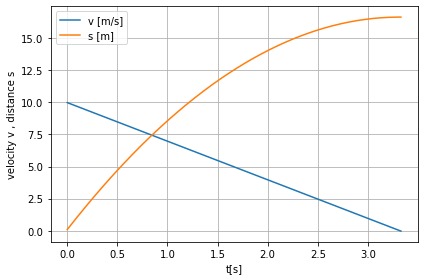

In [34]:
# KONSTANTE
dt = 0.01       # časovni korak [s]
t_total = 10    # celotni čas 10s
a_0 = -3          # trenutni pospešek 
v_0 = 10          # trenutni pospešek 

# imeli bomo 4 stolpce, 
data = np.empty((0,3))
t = 0             # trenutni čas 
v = v_0           # trenutna hitrost
s = 0             # trenutna pot

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:
    # pospešsk --> hitrost
    v += a_0*dt # v = const

    # hitrost --> pot
    s += v * dt   # pot se enakomerno povečuje

    # podatki ene iteracije so ena vrstica vrstico
    vrstica = np.array([t, v, s])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))
    
    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

    # ker je enakomerno pojemajoče gibanje, se objekt
    # ustavi, kadar je hitrost 0
    if v <= 0:
        break

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
# a_arr = data.T[1]  
v_arr = data.T[1]  
s_arr = data.T[2]  

# IZRIŠEMO PODATKE
figure, ax = plt.subplots()

ax.plot(t_arr, v_arr, label = 'v [m/s]')
ax.plot(t_arr, s_arr, label = 's [m]')

ax.legend()

ax.set_ylabel('velocity v , distance s')
ax.set_xlabel('t[s]')

# grid na vse grafe
plt.grid()

# razmiki
plt.tight_layout()
# display
plt.show()


# NE-ENAKOMERNO POSPEŠENO GIBANJE

ZAKAJ SE V GIMNAZIJI NE UČIMO NE-ENAKOMERNO POSPEŠENEGA GIBANJA... KER GA JE TEORETIČNO ZELO TEŽKO RAČUNATI

Pri različnih pospeških je vsaka časovni trenutek odvisen od trenutka pred njim, zato je včasih potrebno simulacije delati v for/while zanki.

\begin{equation*}
    \begin{array}{l}

    a = not const  & \text{ ... acceleration} \\
    v = a*t &  \text{ ... velocity} \\
    s = s_0 + v_0*t+0.5*a*t^2  & \text{ ...path}\\   

    \end{array}
\end{equation*}

### NALOGA: Pospešujočemu avtomobilu dodamo zračni upor
Zračni upor se povečuje s kvadratom hitrosti zraka

st_tock = 300.0


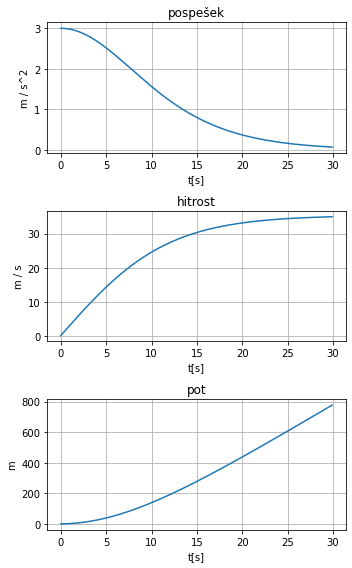

In [39]:
# vhodni podatki za izračun
dt = 0.1       # časovni korak 100ms [s]
t_total = 30   # celotni čas 1min = 60s
st_tock = t_total/dt
print(f'st_tock = {st_tock}')

a_0 = 3  # začetni pospešek [m/s^2]
v_0 = 0  # začetna hitrost [m/s]

# imeli bomo 3 stolpce, 
data = np.empty((0,4))
t = 0               # trenutni čas 
v = 0               # trenutna hitrost
s = 0               # trenutna pot

# zanko poganjamo dokler ne simuliramo celotnega časa 
while t <= t_total:

    # poenostavljen začni upor, drag force 
    f_drag = 1.2 * v**2   # sila zračnega upora je odvisna od kvadrata hitrosti zraka
    a_drag = f_drag / 500 # pospešek = sila / masa

    # ob vsakem trenutku, je različen pospešek
    # osnovni pospešek - zračni upor
    a = a_0 - a_drag

    # pospešek --> hitrost
    v = v + a*dt # v = const

    # hitrost --> pot
    s = s + v * dt   # pot se enakomerno povečuje

    # podatki ene iteracije so ena vrstica vrstico
    vrstica = np.array([t, a, v, s])

    # vrstico dodamo k podatkom
    data = np.vstack((data, vrstica))
    
    # čas povečamo za dt in začnemo novo iteracijo
    t += dt

# podatke transponiramo, da lažje dostopamo do stolpcev
t_arr = data.T[0]  
a_arr = data.T[1]  
v_arr = data.T[2]  
s_arr = data.T[3]  

plot_pos_hit_pot(t_arr, a_arr, v_arr, s_arr)

# # IZRIŠEMO PODATKE
# figure, ax = plt.subplots(3,1)

# ax[0].plot(t_arr, a_arr, 'b', label = 'a [m/s^2]')
# ax[1].plot(t_arr, v_arr, 'r', label = 'v [m/s]')
# ax[2].plot(t_arr, s_arr, 'black', label = 's [m]')

# ax[0].legend()
# ax[1].legend()
# ax[2].legend()

# # grid na vse grafe
# plt.grid()
# # razmiki
# plt.tight_layout()
# # display
# plt.show()

# OPAŽANJA NALOGE
- avto je pospeševal do hitrosti 30m/s cca 100km/h, potem je postal zračni upor tako močan da se je izenačil z močjo motorja in je avto začel voziti pri konstantni hitrosti
- tudi prevožena pot se je na začetku eksponentno povečevala, potem pa samo še linearno

In [38]:
def plot_pos_hit_pot(t_arr, a_arr, v_arr, s_arr):
    # IZRIŠEMO PODATKE
    figure, axis = plt.subplots(3, 1)
    figure.set_size_inches(5, 8)

    # graf pospeška
    axis[0].plot(t_arr, a_arr)
    axis[0].set_title("pospešek")
    axis[0].set_ylabel('m / s^2')
    axis[0].set_xlabel('t[s]')

    # graf hitrosti
    axis[1].plot(t_arr, v_arr)
    axis[1].set_title("hitrost")
    axis[1].set_ylabel('m / s')
    axis[1].set_xlabel('t[s]')

    # graf poti
    axis[2].plot(t_arr, s_arr)
    axis[2].set_title("pot")
    axis[2].set_ylabel('m')
    axis[2].set_xlabel('t[s]')

    # grid na vse grafe
    for ax in axis:
        ax.grid(True)

    # razmik med grafi
    plt.tight_layout()
    # display
    plt.show()